In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import datetime as dt
import pprint
import seaborn as sb

In [2]:
city_df = pd.read_csv("city_data.csv")
#city_df.head()

In [3]:
ride_df = pd.read_csv("ride_data.csv")
#ride_df.head()

In [4]:
merged_df = pd.merge(city_df, ride_df, on="city")
#merged_df.head()

In [5]:
#total fare collected
all_fares = merged_df['fare'].sum().round(2)
#print(all_fares)

In [6]:
#total rides taken  (2407 if .count but 2375 if .nunique ?)
all_rides = merged_df['ride_id'].count()
#print(all_rides)

In [7]:
#group by type for ease of next questions
rides_by_city_data = merged_df['type'].value_counts()
rides_by_city_data = rides_by_city_data.to_frame().reset_index()
rides_by_city_data = rides_by_city_data.rename(columns={'index': 'type', 'type': 'ride_count'})
#print(rides_by_city_data)

In [8]:
city_grp_df = merged_df.groupby('city')
#city_grp_df.head()

In [9]:
#create series to hold number of rides series and count rides for each city using size on grouped city dat
rides_by_city_series = city_grp_df.size()
ride_by_city_df = pd.DataFrame(data=rides_by_city_series).reset_index()
#create a column for result data to relabel later, label index as 'index' to facilitate future combines
ride_by_city_df.index.name = 'index'
#print(ride_by_city_df)

In [10]:
#get average fare for each city using mean on grouped city data
avg_fare_series = city_grp_df.mean().round(2)
#convert the resulting series to a dataframe so it may be combined with the previous ride data
avg_fare_df = pd.DataFrame(avg_fare_series).drop(columns='ride_id').reset_index()
#merge the two dataframes
analysis_df = ride_by_city_df.merge(avg_fare_df, on='city', how='left')
#relabel the columns how they will be searched and appear on plot, except 'city'
#because it will have to be used for an on='city' when joining city_type
newcols = {
    0: 'Total Rides/City',
    'fare': 'Avg Fare ($)',
    'driver_count': 'Number of Drivers'
}
analysis_df.rename(columns=newcols, inplace=True)
#print(analysis_df)

In [11]:
#drop unecessary columns from merged_df to leave only the type and city name
city_drop = merged_df.drop(columns=['date', 'fare', 'driver_count','ride_id'])

In [12]:
city_drop = city_drop.drop_duplicates().sort_values(by='city').reset_index()
#print(city_drop)

In [13]:
#add city type data to analysis dataframe
analysis_df = city_drop.merge(analysis_df, on='city', how='right')
#drop the unecessary 'index column' from city type df
analysis_df = analysis_df.drop(axis=1, columns='index')
#relabel columns appropriately
newcols2 = {
    'city': 'City',
    'type': 'Type of City'
}
analysis_df.rename(columns=newcols2, inplace=True)
#print(analysis_df)

In [14]:
#create summary table for % of Total Fares Data to become pie chart
fares_drivers_ttls_by_type = merged_df.groupby(['type']).sum().reset_index()
percent_of_total_data = fares_drivers_ttls_by_type.merge(rides_by_city_data, how='left')
#use rides_by_city data as it has all desired columns but drop ride_id
percent_of_total_data = percent_of_total_data.drop(columns=['ride_id'])
#round as these are $ transactions
percent_of_total_data = percent_of_total_data.round(2)
#print(percent_of_total_data)

In [15]:
#create a variable to hold summed/total data and append result to table
percent_of_total_data_sum = percent_of_total_data.append(percent_of_total_data.sum(), ignore_index=True)
percent_of_total_data_sum.round(2)
print(percent_of_total_data_sum)

                 type  driver_count      fare  ride_count
0               Rural           727   4255.09         125
1            Suburban          9730  20335.69         657
2               Urban         64501  40078.34        1625
3  RuralSuburbanUrban         74958  64669.12        2407


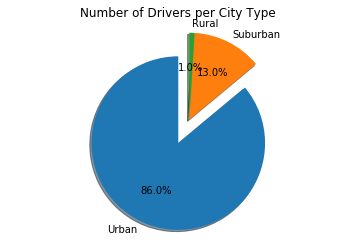

In [16]:
#create labels and copy sizes to plot pie chart, explode the largest which is typically urban
labels = 'Urban', 'Suburban', 'Rural'
sizes = [64501, 9730, 727]
explode = (0.3, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Number of Drivers per City Type")
plt.show()

# label_data = percent_of_total_data.values.T.tolist()
# sum_data = percent_of_total_data_sum.round(2).values.T.tolist()
# print(label_data)
# type_data = label_data[0]
# driver_data = label_data[1]
# fare_data = label_data[2]
# ride_data = label_data[3]

# labels = ([type_data])
# sizes = ([driver_data])
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='{:1.1f}', shadow=True, startangle=90)
# ax1.axis('equal')
# plt.show()

# percent of total
# [['Rural', 'Suburban', 'Urban'], [727, 9730, 64501], [4255.09, 20335.69, 40078.34], [125, 657, 1625]]

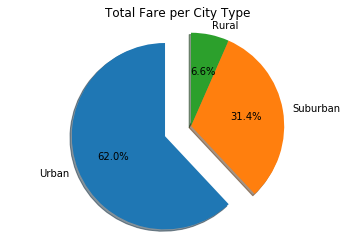

In [17]:
labels = 'Urban', 'Suburban', 'Rural'
sizes = [40078.34, 20335.69,  4255.09]
explode = (0.3, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total Fare per City Type")
plt.show()

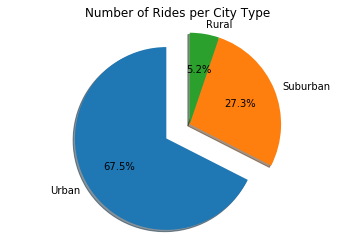

In [18]:
labels = 'Urban', 'Suburban', 'Rural'
sizes = [1625, 657, 125]
explode = (0.3, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Number of Rides per City Type")
plt.show()

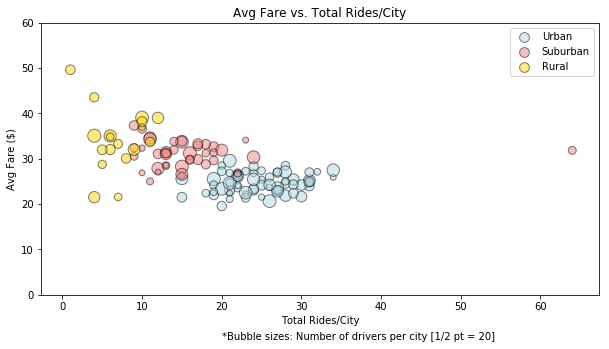

In [29]:
#use size of bubble as indicator of number of drivers as least important plot point per 
#data requested, make fig size standard previously used

size = round(analysis_df['Number of Drivers']**0.5*20, 0) 
plt.figure(figsize = (10,5))

#locate within the analysis data frame column 'Total Rides/City' all types labeled 'Urban'
   #make that associated number of rides = the point's location on the X-axis
#locate within the analysis data frame column 'Avg Fare' all types labeled 'Urban'
   #make that associated average cost of the ride = the point's location on the y-axis
#make the size of that plot point = the rounded number of drivers for that city
#label that plot point Urban

plt.scatter(analysis_df['Total Rides/City'].loc[analysis_df["Type of City"] == "Urban"], 
            analysis_df['Avg Fare ($)'].loc[analysis_df["Type of City"] == "Urban"] , 
            s = size, alpha = 0.5, color = 'lightblue', edgecolors='black',
            label = "Urban")

#repeat for rides, fare and cities of two other types
plt.scatter(analysis_df['Total Rides/City'].loc[analysis_df["Type of City"] == "Suburban"], 
            analysis_df['Avg Fare ($)'].loc[analysis_df["Type of City"] == "Suburban"] ,
            s = size, alpha = 0.5, color = 'lightcoral', edgecolors='black', label = "Suburban")

plt.scatter(analysis_df['Total Rides/City'].loc[analysis_df["Type of City"] == "Rural"],
            analysis_df['Avg Fare ($)'].loc[analysis_df["Type of City"] == "Rural"] , 
            s = size, alpha = 0.5, color ='gold', edgecolors='black', label = "Rural")

plt.ylabel('Avg Fare ($)')
plt.xlabel('Total Rides/City')
plt.title("Avg Fare vs. Total Rides/City")
plt.legend()
plt.ylim(0,60)
note = ("*Bubble sizes: "
        "Number of drivers per city"
        " [1/2 pt = 20]")
plt.text(20, -10 ,note, wrap = True )
plt.show()

In [ ]:
# pyber
Using Python Matplotlib and Seaborn libraries to examine and visually represent ride sharing trends in relation to individual cities and their 'Type's {Urban, Suburban, Rural}.

Objectives:
*To build bubble plot showcasing the relationship between four key variables:
- Average Fare ($) Per City
- Total Number of Rides Per City
- Total Number of Drivers Per City
- City Type (Urban, Suburban, Rural)

*To produce summative pie charts showing:
- % of Total Fares by City Type
- % of Total Rides by City Type
- % of Total Drivers by City Type

Process:
1. Established connections to needed libraries [Numpy, Matplotlib, Pandas, & Seaborn].

2. Read in and then merged the two CSVs that tracked number of drivers per city and ride information. This allowed the data to be amassed into a singular dataframe on which I performed initial summary calculations and groupings to inspect the data. 

3. Only using grouped-by' data would not have allowed comparative manipulations needed to produce requested visualizations. So, I broke out individual series to manipulate city-linked data and clean up values (associating individual rides with all others from that city, calculating averages, rounding, dropping unrelated columns/data like ride_ids).

4. Adding all desired series to a final dataframe and renaming columns appropriately set up the ability to cycle through the same dataframe and use .loc for the variables to be plotted.

5. Created a summary table for % of Total Fares Data to inform the three pie charts. Using the original ride_by_city data and dropping the ride_id column produced all the summary data needed. Then summed all the data and saved as it's own row to append to the table [mostly for comparative/further information for the viewer of the pie charts, as the exact 'counts' or 'sums' weren't on the charts].

6.Created a scatter plot with bubbles sized at a 1/2 point for every 20 drivers in that city [driver count as size of bubble], plotted each point per city type using the number of rides for the city [to show which city type had concentrations of number of rides] as the x coordinate on the graph and the fare as the y [to cluster the prices per type possibly showing a trend for ideal ratios between number of drivers, fare cost and rides taken]. Color coded and outlined each plot point: Light Blue = Urban, Light Coral = Suburban & Gold = Rural.

7. The data seems to suggest that Rural fares were the highest per ride, which would make sense likely given geographical distance between locations. Urban riders took more but less expensive trips, again likely reflective of city travel between short distance locations. A suburban outlier with more than 60 rides was left in to warrant further investigation of the possible event or events that triggered the high usage despite above average fare rates when compared to other Suburban data points. 